/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 96s 110ms/step - accuracy: 0.8773 - loss: 0.4071 - val_accuracy: 0.9850 - val_loss: 0.0493
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 133s 99ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 68s 81ms/step - accuracy: 0.9873 - loss: 0.0384 - val_accuracy: 0.9888 - val_loss: 0.0410
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9906 - loss: 0.0296 - val_accuracy: 0.9918 - val_loss: 0.0296
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9915 - val_loss: 0.0308
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9917 - val_loss: 0.0346
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9951 - loss: 0.0141 - val_accuracy: 0.9908 - val_loss: 0.0355
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.9957 - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[1.30313679e-15 3.50964292e-11 1.12571445e-11 2.73603806e-09
  7.28930138e-16 3.22020383e-12 2.78415061e-19 1.00000000e+00
  1.19297974e-12 2.18181223e-10]]
7


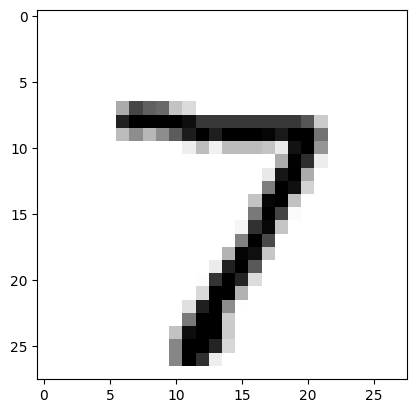

In [4]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
import joblib

model=keras.Sequential([
Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
MaxPooling2D((2,2),strides=2),

Conv2D(64, (3, 3), padding="same", activation="relu"),
MaxPooling2D((2, 2), strides=2),

Flatten(),

Dense(128, activation='relu'),
Dropout(0.2),
Dense(10, activation='softmax')
])

print(model.summary())

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

X_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)

model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
model.evaluate(x_test, y_test)
model.save('mnist_model.h5')

n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)

print(res)
print(np.argmax(res))

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()